In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy import feature as cfeature

### Open saved metar dataframe

In [2]:
met_df = pd.read_pickle('metar_20190801_df.pkl')

### Looking at metar data

Highest readings and their locations.

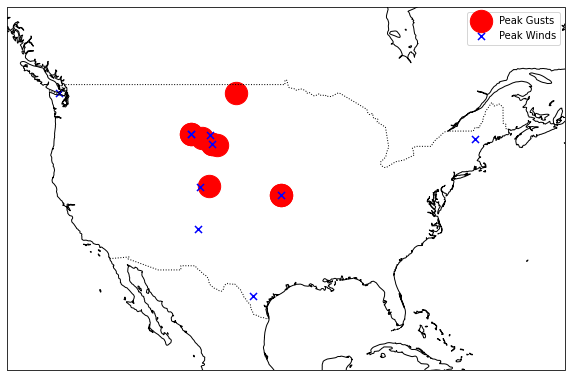

      MetWindGust  Longitude  Latitude  Temperature  WindSpeed  WindDirection  \
870          18.0    -104.32     43.88       290.15       12.4          220.0   
1088         17.5    -105.54     44.35       292.05        5.1          280.0   
1104         17.5    -106.97     44.77       293.15       12.9          210.0   
770          17.0     -95.62     39.07       295.95       11.3          110.0   
1222         17.0     -95.62     39.07       295.35        8.8           60.0   
889          16.5    -106.97     44.77       298.15       10.3          160.0   
790          15.4    -104.67     39.86       293.75        3.1            0.0   
951          14.9    -101.28     48.27       293.75        9.3           30.0   
1485         14.4    -103.62     43.73       290.95        9.3          270.0   
1268         14.4    -104.32     43.88       290.15        5.7          350.0   

      Pressure  
870        0.0  
1088       0.0  
1104       0.0  
770   101660.0  
1222       0.0  
889   

In [3]:
gust_metar = met_df.sort_values(by=['MetWindGust'], ascending=False)
highest_gust = gust_metar[0:10]

wind_metar = met_df.sort_values(by=['WindSpeed'], ascending=False)
highest_wind = wind_metar[0:10]

fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.scatter(highest_gust.Longitude, highest_gust.Latitude, c='Red',
             vmin=0, vmax=50, s=500, label='Peak Gusts', transform=ccrs.PlateCarree())
plt.scatter(highest_wind.Longitude, highest_wind.Latitude, c='Blue',
             vmin=0, vmax=50, s=50, label='Peak Winds', marker='x', transform=ccrs.PlateCarree())

plt.legend()
plt.show()
print(highest_gust)

### Filtering the measurements

Finding situations where wind gust is greater than 15.6 m/s. "Moderate Risk" for general populace, higher risk for aviation. 

In [5]:
filtered_values = np.where((met_df['MetWindGust']>=15.6))

high_gust = met_df.loc[filtered_values]
display(high_gust)

,MetWindGust,Longitude,Latitude,Temperature,WindSpeed,WindDirection,Pressure
770,17.0,-95.62,39.07,295.95,11.3,110.0,101660.0
870,18.0,-104.32,43.88,290.15,12.4,220.0,0.0
889,16.5,-106.97,44.77,298.15,10.3,160.0,101400.0
1088,17.5,-105.54,44.35,292.05,5.1,280.0,0.0
1104,17.5,-106.97,44.77,293.15,12.9,210.0,0.0
1222,17.0,-95.62,39.07,295.35,8.8,60.0,0.0


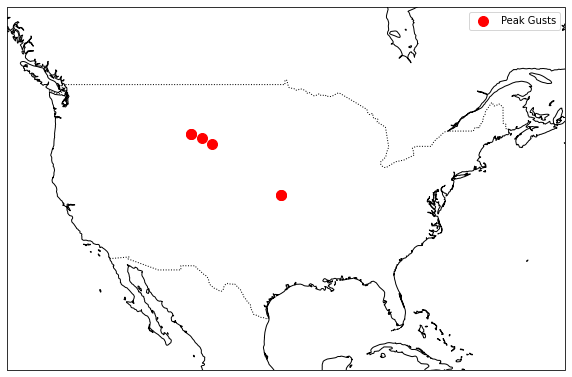

In [6]:
fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-130, -60, 20, 55], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.scatter(high_gust.Longitude, high_gust.Latitude, c='Red',
             vmin=0, vmax=50, s=100, label='Peak Gusts', transform=ccrs.PlateCarree())

plt.legend()
plt.show()